<a href="https://colab.research.google.com/github/aaa-aashna/iris-classification-ml-basics/blob/main/ML_AI_Foundations_Section2_Lab2_Aashna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
SEED = 42
np.random.seed(SEED)


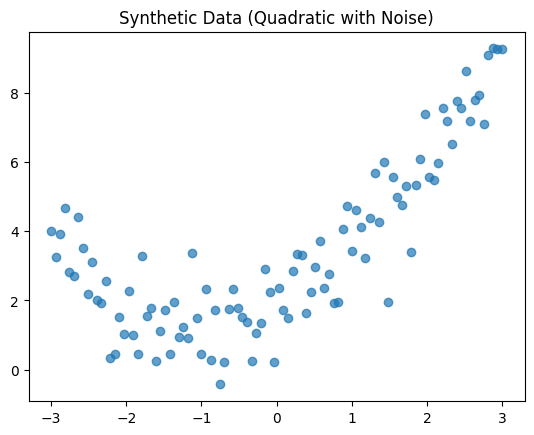

In [2]:
# True function: y = 0.5x^2 + x + 2 + noise
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5*X**2 + X + 2 + np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Data (Quadratic with Noise)")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=SEED
)


In [5]:
def train_and_evaluate(degree):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Degree {degree}: Train MSE={train_mse:.3f}, Test MSE={test_mse:.3f}, "
          f"Train R2={r2_train:.3f}, Test R2={r2_test:.3f}")

    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred_range = model.predict(X_range)

    plt.scatter(X_train, y_train, label="Train", alpha=0.6)
    plt.scatter(X_test, y_test, label="Test", alpha=0.6)
    plt.plot(X_range, y_pred_range, color="red", linewidth=2,
             label=f"Model (degree {degree})")

    plt.legend()
    plt.title(f"Polynomial Regression (degree {degree})")
    plt.show()


Degree 1: Train MSE=2.960, Test MSE=2.408, Train R2=0.545, Test R2=0.412


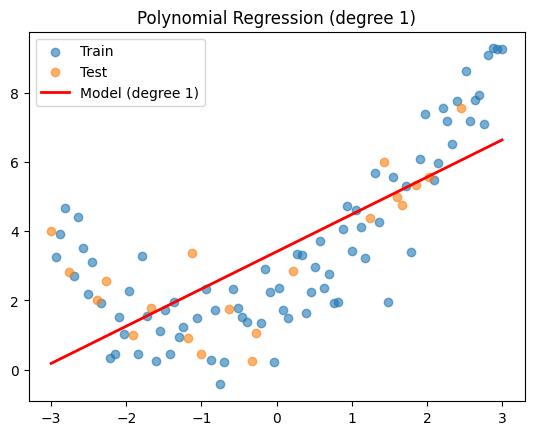

Degree 2: Train MSE=0.860, Test MSE=0.620, Train R2=0.868, Test R2=0.849


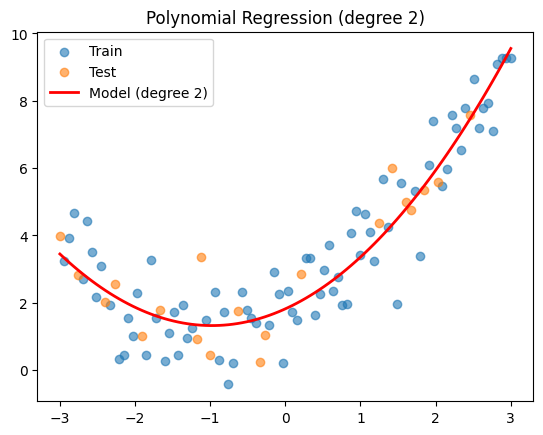

Degree 10: Train MSE=0.749, Test MSE=0.817, Train R2=0.885, Test R2=0.800


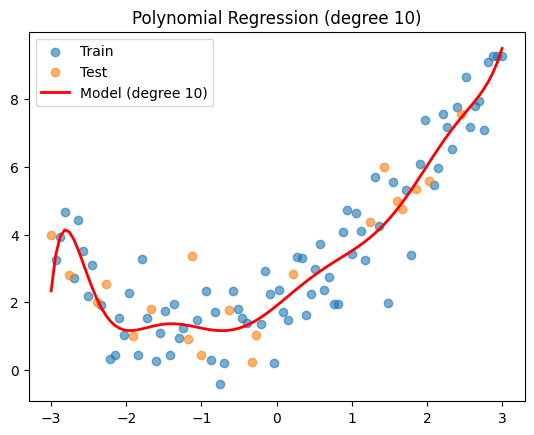

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)
for d in [1, 2, 10]:
    train_and_evaluate(d)


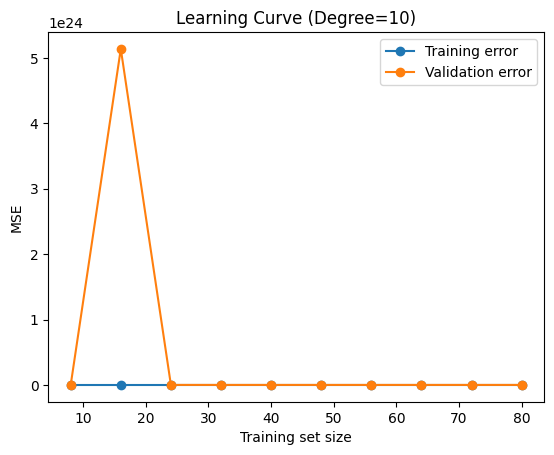

In [8]:
train_sizes, train_scores, test_scores = learning_curve(
Pipeline([
("poly", PolynomialFeatures(degree=10, include_bias=False)),
("scaler", StandardScaler()),
("linreg", LinearRegression())
]),
X, y.ravel(), cv=5,
scoring="neg_mean_squared_error",
train_sizes=np.linspace(0.1, 1.0, 10),
random_state=SEED
)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_mean, "o-", label="Training error")
plt.plot(train_sizes, test_mean, "o-", label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.title("Learning Curve (Degree=10)")
plt.legend()
plt.show()

We created synthetic data where the true relationship was known, so we could clearly study model behavior.

We trained polynomial regression models with different degrees to control model complexity.

A low-degree model (degree 1) was too simple and underfit the data (high bias).

A medium-degree model (degree 2) matched the true pattern and generalized well.

A high-degree model (degree 10) fit the training data very well but performed poorly on test data (overfitting / high variance).

Comparing training vs test error helped identify underfitting and overfitting.

Learning curves showed how error changes with more data and highlighted variance problems.

MSE and R² were used together to evaluate model performance and understand fit quality.

The key takeaway is the bias–variance tradeoff: increasing complexity helps up to a point, then hurts generalization.